In [932]:
from DrawSolution import draw_pallet
from class_item import Item
import copy
from matplotlib import pyplot as plt
from matplotlib import patches

eps = 1

poligon1 = [[0,1,0], [1,1,1], [0,1,0]]
poligon2 = [[1,1], [1,0]]
poligon3 = [[1,1,1], [0,1,0]]

points_1 = [[0,3], [2,0], [3,1], [2,1], [1, 4]]
points_2 = [[0,8], [1,8], [1,8]]
points_3 = [[0,3], [2,0], [2,1], [3,2], [1, 4]]

poligon_matrix = [[1,1,1,1], [1,1,1,1], [1,1,1,1]]
short_poligon_matrix = [[1,1,1,1,1,1,1,1]]

poligons = [copy.deepcopy(points_2), copy.deepcopy(points_2), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1)]

items = [Item(i, poligons[i]) for i in range(len(poligons))]

items[0].matrix = short_poligon_matrix
items[1].matrix = short_poligon_matrix

for item in items:
    if item.matrix is None:
        item.matrix = poligon_matrix

pallet_width = 7
pallet_height = 8

matrix = [[0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0]]

In [933]:
def draw_pallet(items, pallet_width, pallet_height):
    # fig, ax = plt.subplots(figsize=(pallet_height, pallet_height))
    fig, ax = plt.subplots()
    pallet = patches.Rectangle((0, 0), pallet_width, pallet_height, linewidth=2, facecolor='none', edgecolor='blue')
    ax.add_patch(pallet)
    ax.set_xlim(-1, pallet_width + 1)
    ax.set_ylim(-1, pallet_height + 1)
    for item in items:
        for point in item.points:
            point[0] += item.lb_x
            point[1] += item.lb_y
        polygon = patches.Polygon(item.points)
        ax.add_patch(polygon)
    return fig, ax

In [934]:
def print_matrix(matrix):
    for i in range(len(matrix)):
        print(matrix[i])
        print('\n')

In [935]:
def fit_item(pallet, item):
    for i in range(len(pallet[0])):
        for j in range(len(pallet)):
            exit = False
            # условия, что объект влезает
            if len(item.matrix) + i <= len(pallet) and len(item.matrix[0]) + j <= len(pallet[0]):
                # располагаем объект
                for p in range(len(item.matrix)):
                    for k in range(len(item.matrix[0])):
                        # решаем есть ли пересечение
                        if pallet[i+p][j+k] + item.matrix[p][k] == 2:
                            exit = True
                            break
                    if exit:
                        break
            else:
                exit = True
            # если пересечений нет и элемент влезает, то добавляем его
            if not exit:
                item.lb_x = i
                item.lb_y = j
                for p in range(len(item.matrix)):
                    for k in range(len(item.matrix[0])):
                        pallet[i+p][j+k] += item.matrix[p][k]
                break
        if not exit:
            break
    # print_matrix(pallet)
    # print('--------------')
    return pallet, exit

In [936]:
def find_lb_coordinates(items, eps):
    for item in items:
        item.lb_x = item.lb_x * eps
        item.lb_y = item.lb_y * eps
    return items

In [937]:
def fit_pallets(matrix, items, eps):
    pallets = []
    pallets.append(copy.deepcopy(matrix))
    for item in items:
        i=0
        exit = True
        while exit and i<len(pallets):
            pallets[i], exit = fit_item(pallets[i], item)
            if exit and i==(len(pallets)-1):
                pallets.append(copy.deepcopy(matrix))
            if not exit:
                item.pallet_number = i
                # print(i)
            i+=1
    find_lb_coordinates(items, eps)

    return pallets

In [938]:
def understand_pallets(items):
    packing = []
    # print([item.pallet_number for item in items])
    for i in range(max([item.pallet_number for item in items])):
        # print(i)
        packing.append([])
    print(packing)
    for i in range(max([item.pallet_number for item in items])):
        for item in items:
            if item.pallet_number > len(packing):
                    packing.append([])
            if item.pallet_number == i:
                packing[i].append(item)
    print([item.pallet_number for item in items])

    print(packing)
    return packing
            # print(packing, '\n')
            # print(packing[i], '\n')
            # print(packing[i][0].points, '\n')
            # print('-----------')

# print(packing)
    
def draw_all_pallets(packing):
    print(len(packing))
    for i in range(len(packing)):
        print(i)
        draw_pallet(packing[i], pallet_width, pallet_height)

In [939]:
# import rastr_method
# import copy


def swap(list, pos1, pos2):

    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list


#  алгоритм локального поиска
def locSearch(matrix, poligons, eps):
    # print(eps)

    n = len( poligons)

    objVal = len(fit_pallets(matrix,  poligons, eps))

    poligons_copy = copy.deepcopy(poligons)

    betterNeighboor = (0,0)
    stop = False
    while not stop:
        stop = True
        for i in range(n):
            for j in range(i + 1, n, 1):
                # надо сделать, что бы два раза не проходила
                pal = fit_pallets(matrix, swap(poligons, i, j), eps)
                # print(items[0].pallet_number)
                # val = len(fit_pallets(matrix, swap(copy.deepcopy(poligons), i, j), eps))
                val = len(pal)
                if val < objVal:
                    stop = False
                    objVal = val
                    betterNeighboor = (i,j)
                    fit_pallets(matrix, swap(poligons, i, j), eps)

                if betterNeighboor[1] != 0:
                    poligons = swap( poligons, betterNeighboor[0], betterNeighboor[1])
                    poligons_copy = swap( poligons_copy, betterNeighboor[0], betterNeighboor[1])


   
    
    # for i in range(len(pal)):
    #     print_matrix(pal[i])
    #     print('--------------')
    # understand_pallets(poligons_copy)

    draw_all_pallets(understand_pallets(items))

    return val

In [940]:
# fit_pallets(matrix, items, eps)


[[], [], []]
[0, 0, 1, 0, 0, 1, 1, 1, 2, 2]
[[<class_item.Item object at 0x0000013914EB32E0>, <class_item.Item object at 0x000001391489E100>, <class_item.Item object at 0x0000013914E9D9D0>, <class_item.Item object at 0x000001391489EF10>], [<class_item.Item object at 0x000001391489E1C0>, <class_item.Item object at 0x000001391489EEB0>, <class_item.Item object at 0x000001391489E7F0>, <class_item.Item object at 0x000001391489E610>], [<class_item.Item object at 0x0000013914E9D940>, <class_item.Item object at 0x000001391489E760>]]


3

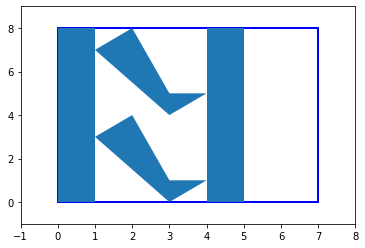

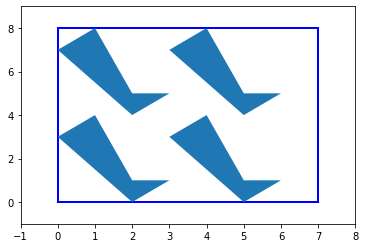

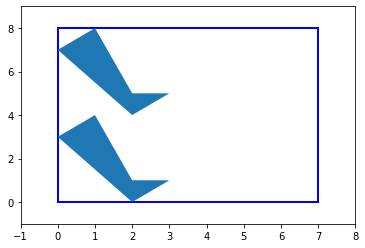

In [941]:
locSearch(matrix, items, eps)